# Importing Data On HealthCare Costs

*Make sure to open terminal and cd to your working directory*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import collections  as mc
import numpy as np

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

import warnings
import string

warnings.filterwarnings('ignore')

%matplotlib inline

## Import heart attack data

In [2]:
ha_costs_df = pd.read_csv('data/mmd_heart_attack_data.csv')

*Examine the first 5 rows and the last five rows of the TN heart attack  data.*

In [3]:
ha_costs_df.head(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [4]:
ha_costs_df.tail(5)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


*Check the data types of each column.*

In [5]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.9+ KB


### Keep only the rows where facilities are in TN

In [6]:
TN_heart = ha_costs_df.query('state == "TENNESSEE"')

*Print the dimensions of the data.*

In [7]:
TN_heart.shape

(91, 17)

*See how many TN counties are represented in the heart attack costs data.*

In [8]:
TN_heart.county.nunique()

91

*See how many counties are classified as Urban and how many as Rural.*

In [9]:
Urb_heart = TN_heart.query('urban =="Urban"')

In [10]:
Urb_heart.shape

(38, 17)

In [11]:
Rur_heart = TN_heart.query('urban =="Rural"')

In [12]:
Rur_heart.shape

(53, 17)

*Examine the distribution of costs.*

In [13]:
TN_heart.describe()

,year,fips,analysis_value
count,91.0,91.000000,91.000000
mean,2017.0,47093.615385,45762.989011
std,0.0,55.338708,6574.670462
min,2017.0,47001.000000,30831.000000
25%,2017.0,47046.000000,41105.500000
50%,2017.0,47093.000000,45384.000000
75%,2017.0,47142.000000,49698.500000
max,2017.0,47189.000000,62641.000000


In [14]:
Urb_heart.describe()

,year,fips,analysis_value
count,38.0,38.000000,38.000000
mean,2017.0,47103.789474,45748.921053
std,0.0,60.904071,7109.788921
min,2017.0,47001.000000,32279.000000
25%,2017.0,47049.500000,40452.750000
50%,2017.0,47112.000000,45496.500000
75%,2017.0,47160.500000,50734.500000
max,2017.0,47189.000000,61541.000000


In [15]:
Rur_heart.describe()

,year,fips,analysis_value
count,53.0,53.000000,53.000000
mean,2017.0,47086.320755,45773.075472
std,0.0,50.309723,6232.724885
min,2017.0,47003.000000,30831.000000
25%,2017.0,47045.000000,41240.000000
50%,2017.0,47085.000000,45384.000000
75%,2017.0,47123.000000,48998.000000
max,2017.0,47185.000000,62641.000000


**There does not seem to be a significant difference in heart attack costs between urban and rural counties at first glance.**

## Import Cancer Data

In [16]:
cancer_costs_df = pd.read_csv("data/mmd_cancer_data.csv")

*Look at the head and tail of the DataFrame*

In [17]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [18]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


*Print the shape of the DataFrame.*

In [19]:
cancer_costs_df.shape

(3165, 17)

### Keep only the rows where facilities are in TN.

In [20]:
TN_cancer = cancer_costs_df.query('state == "TENNESSEE"')

*Print the dimensions of the data.*

In [21]:
TN_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 2396 to 2490
Data columns (total 17 columns):
year                   95 non-null int64
geography              95 non-null object
measure                95 non-null object
adjustment             95 non-null object
analysis               95 non-null object
domain                 95 non-null object
condition              95 non-null object
primary_sex            95 non-null object
primary_age            95 non-null object
primary_dual           95 non-null object
fips                   95 non-null int64
county                 95 non-null object
state                  95 non-null object
urban                  95 non-null object
primary_race           95 non-null object
primary_denominator    95 non-null object
analysis_value         95 non-null int64
dtypes: int64(3), object(14)
memory usage: 13.4+ KB


*See how many TN counties are represented in the cancer costs data.*

In [22]:
TN_cancer.county.nunique()

95

*Find which counties are missing from one of the datasets.*

In [23]:
list(set(TN_cancer.county)-set(TN_heart.county))

['Van Buren County', 'Pickett County', 'Moore County', 'Hancock County']

In [24]:
#The above method assumes that we aren't missing any counties from the cancer set that are in the heart set. To remedy this:

cancer_counties = list(TN_cancer.county.unique())
ha_counties = list(TN_heart.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Pickett County', 'Hancock County', 'Moore County', 'Van Buren County']

*Examine the distribution in costs between urban and rural counties.*

In [25]:
Urb_cancer = TN_cancer.query('urban == "Urban"')

In [26]:
Rur_cancer = TN_cancer.query('urban == "Rural"')

In [27]:
Urb_cancer.describe()

,year,fips,analysis_value
count,38.0,38.000000,38.000000
mean,2017.0,47103.789474,19638.605263
std,0.0,60.904071,2712.218435
min,2017.0,47001.000000,15454.000000
25%,2017.0,47049.500000,17674.750000
50%,2017.0,47112.000000,19203.500000
75%,2017.0,47160.500000,20556.750000
max,2017.0,47189.000000,27740.000000


In [28]:
Rur_cancer.describe()

,year,fips,analysis_value
count,57.0,57.000000,57.000000
mean,2017.0,47089.140351,19837.421053
std,0.0,50.642810,2255.416100
min,2017.0,47003.000000,15531.000000
25%,2017.0,47049.000000,18328.000000
50%,2017.0,47087.000000,19633.000000
75%,2017.0,47129.000000,21315.000000
max,2017.0,47185.000000,25909.000000


In [29]:
TN_cancer.describe()

,year,fips,analysis_value
count,95.0,95.000000,95.000000
mean,2017.0,47095.000000,19757.894737
std,0.0,55.136195,2436.304533
min,2017.0,47001.000000,15454.000000
25%,2017.0,47048.000000,18103.500000
50%,2017.0,47095.000000,19563.000000
75%,2017.0,47142.000000,21153.000000
max,2017.0,47189.000000,27740.000000


**There does not seem to be a significant difference between cancer costs at first glance between rural and urban counties in TN.**

## Import the IRS income data.

In [30]:
income_df = pd.read_csv("data/irs_county_2016.csv")

### Keep only the income data that pertains to TN.

In [31]:
TN_income = income_df.query('STATE == "TN"')

*Look at the head and tail of the DataFrame.*

In [32]:
TN_income.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [33]:
TN_income.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


*Look at the shape of the DataFrame.*

In [34]:
TN_income.shape

(768, 148)

*Keep only the following columns:  `['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']`*

In [35]:
TN_income_short = TN_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

*Rename those columns: `['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']`*

In [36]:
TN_income_short.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

*Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions*

In [37]:
TN_income_short.income_bucket.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [38]:
#Total is anything with Tennessee in the county column
#1 = 'Under $1'
# and going up from there
#use syntax dict({1: 'Geeks', 2: 'For', 3:'Geeks'}) 
#need to change the 'income_bucket' column in cases where TN is the county
#then I can use the dictionary
#Maybe I can split the df in two, make a dictionary and change the first 8 rows to Total, change the rest according to the dict, and then paste together

In [39]:
TN_income_sc = TN_income_short.copy()

Create `income_dict`, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions

In [40]:
income_dict = dict([(1, 'Under $1'), 
                    (2,'Between 1 and $10,000'), 
                    (3,'Between 10,000 and $25,000'),
                    (4,'Between 25,000 and $50,000'), 
                    (5,'Between 50,000 and $75,000'), 
                    (6,'Between 75,000 and $100,000'), 
                    (7,'Between 100,000 and $200,000'), 
                    (8,'$200,000 or more')])

Pass the dictionary as an argument to the pandas `replace()` method to change the `income_bucket` column so that it uses descriptive text instead of the numeric code.

In [41]:
TN_income_sc = TN_income_sc.replace({"income_bucket": income_dict})

Use the pandas `groupby()` method to group the data by county and get the `sum()` of all numeric columns for that county. Be sure to also `reset_index()` so that our aggregated data is re-indexed to begin at 0. Save this as a DataFrame called `income_county_agg`, and look at the first few rows.

In [42]:
income_county_agg = TN_income_sc.groupby(['county']).sum().reset_index()

In [43]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


Write a for-loop to iterate through the `income_county_agg` DataFrame and create a list of average incomes for each county. Assign this list to a new column in `income_county_agg` called `avg_income`.

- First create an empty list called `avg_inc_list` 

In [44]:
avg_inc_list = []

- Begin the for-loop to iterate through `income_county_agg` 
    - Store the row's total income in a variable called `income`. Remember to multiply total income by 1000 before storing it in order to get the actual amount.
    - Store each row's `return_count` in a variable called `count`.
    - divide `income` by `count`, round it to the nearest whole number, and `append` it to `avg_inc_list`.

In [45]:
avg_inc_list = []
for row in income_county_agg.iterrows():
    vals = row[1]
    income = vals['total_inc_amt'] * 1000 
    count = vals['returns_with_total_inc']
    avg_inc_list.append(round(income/count, 0))

- Assign `avg_income_list` to a new column in `income_county_agg` called `avg_income`.

In [46]:
income_county_agg['avg_income'] = avg_inc_list
income_county_agg = income_county_agg.sort_values('avg_income', ascending = False)
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0
46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0
32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0
23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0


Find which datasets have missing values? How many? What should you do about it? 

In [47]:
income_df.isnull().sum()
#TN_income.isnull().sum()

STATEFIPS     0
STATE         0
COUNTYFIPS    0
COUNTYNAME    0
agi_stub      0
             ..
A85300        0
N11901        0
A11901        0
N11902        0
A11902        0
Length: 148, dtype: int64

In [48]:
cancer_costs_df.isnull().sum()
#TN_cancer.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [49]:
ha_costs_df.isnull().sum()
#TN_heart.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

There are no missing values in our datasets.

Create a barplot that shows the average income for each county. Be sure your plot stands alone and is labeled to identify any units.

In [50]:
income_county_agg1 = income_county_agg.drop([83]) #I'm dropping the Tennessee row from this df

In [51]:
#sorting first by what we want to plot (average income)
income_county_agg1 = income_county_agg1.sort_values('avg_income', ascending = False).reset_index()
income_county_agg1

,index,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,130072.0
1,18,Davidson County,338340,188690,92280,49720,592430,179250,61720,23487039,337150,23947130,4560,15744,71028.0
2,46,Knox County,207730,97340,81770,24260,394450,119160,49830,14272173,206990,14528414,3410,11587,70189.0
3,32,Hamilton County,164170,75180,61490,23840,312800,97450,40590,11249180,163590,11427589,3560,11502,69855.0
4,23,Fayette County,19030,7510,7910,3190,37250,11450,5510,1289529,18970,1312112,420,1310,69168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,37,Haywood County,8050,3410,2150,2320,15770,5990,1930,295867,8030,299744,210,505,37328.0
91,47,Lake County,2100,850,620,610,4100,1480,550,75298,2100,76517,70,186,36437.0
92,14,Cocke County,14900,6100,5890,2660,28990,8930,3720,532833,14840,537979,700,1548,36252.0
93,13,Clay County,3040,1250,1350,400,6170,1950,850,106103,3020,107688,130,335,35658.0


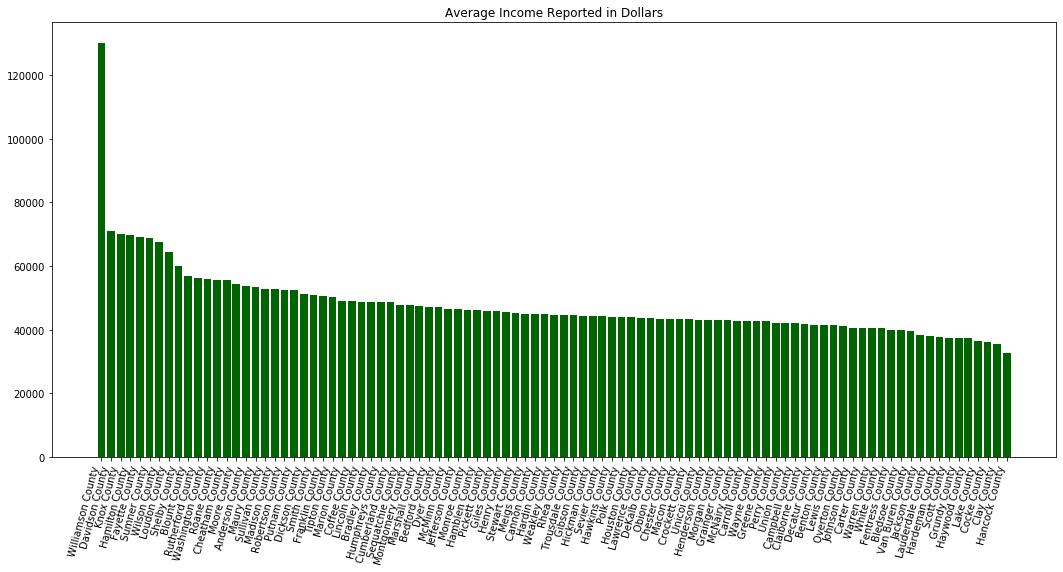

In [52]:
#plt.figure(figsize = (10, 20))
#sns.set(style="whitegrid")
#sns.barplot('avg_income', 'county', data = income_county_agg1, palette = 'colorblind')
#plt.xlabel('Average Income Amount ($/year)')
#plt.ylabel('County in Tennessee')
#plt.title('Average Income for Each County in Tennessee');
plt.figure(figsize = (18, 8))
plt.bar(income_county_agg1.county, income_county_agg1.avg_income, color = 'darkgreen')
plt.title('Average Income Reported in Dollars')
plt.xticks(rotation = 75, ha = 'right');

Create two more barplots: one to show the total cost of a heart attack by county and the other to show the total cost of cancer by county

In [53]:
TN_heart = TN_heart.sort_values('analysis_value', ascending = False)
TN_cancer = TN_cancer.sort_values('analysis_value', ascending = False)

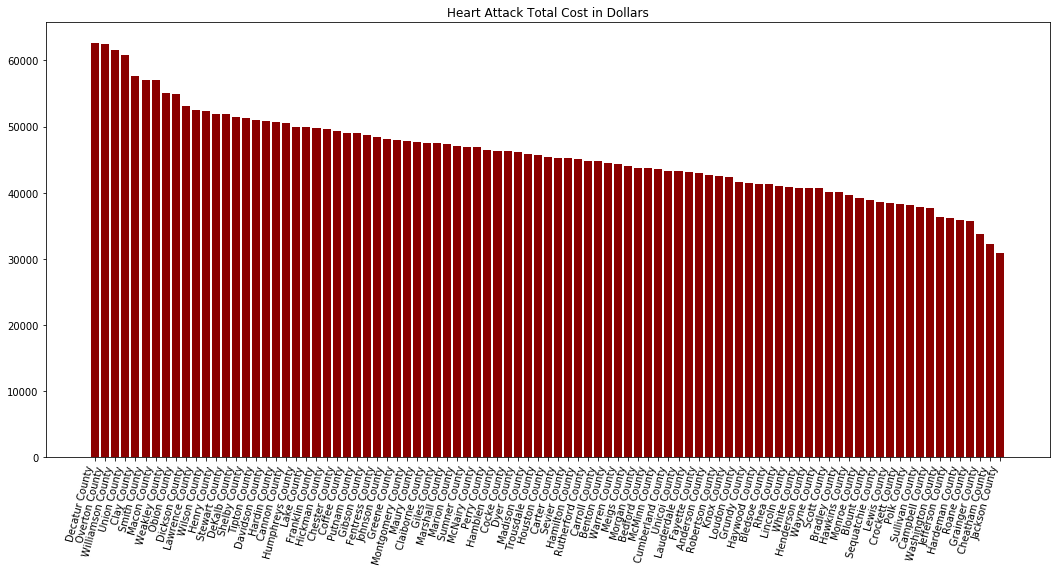

In [54]:
#plt.figure(figsize = (10, 20))
#sns.set(style="whitegrid")
#sns.barplot('analysis_value', 'county', data = TN_cancer, palette = 'colorblind')
#plt.xlabel('Total Cost of Cancer ($/year)')
#plt.ylabel('County in Tennessee')
#plt.title('Cost of Cancer for Each County in Tennessee');
plt.figure(figsize = (18, 8))
plt.bar(TN_heart.county, TN_heart.analysis_value, color = 'darkred')
plt.title('Heart Attack Total Cost in Dollars')
plt.xticks(rotation = 75, ha = 'right');

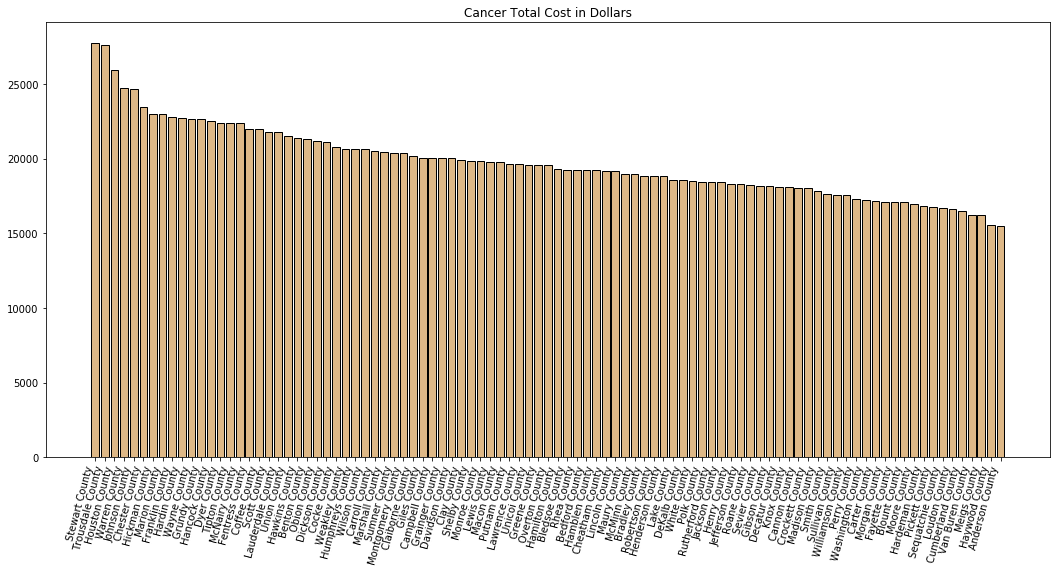

In [55]:
#plt.figure(figsize = (10, 20))
#sns.set(style="whitegrid")
#sns.barplot('analysis_value', 'county', data = TN_cancer, palette = 'colorblind')
#plt.xlabel('Total Cost of Heart Attacks ($/year)')
#plt.ylabel('County in Tennessee')
#plt.title('Cost of Heart Attacks for Each County in Tennessee');
plt.figure(figsize = (18, 8))
plt.bar(TN_cancer.county, TN_cancer.analysis_value, color = 'burlywood', edgecolor = 'black')
plt.title('Cancer Total Cost in Dollars')
plt.xticks(rotation = 75, ha = 'right');

Create a second DataFrame for `tn_ha_costs` - you can name it `tn_ha_costs2` or something similar - by merging tn_ha_costs with income_county_agg and keeping just these four columns:`county`, `urban`, `analysis_value`, `avg_income`.

In [56]:
pd.set_option('display.max_rows', 10)

In [57]:
# we only need the county and the average income from income_county_agg
income_county_agg1 = income_county_agg[['county', 'avg_income']]
income_county_agg1.head(2)

,county,avg_income
94,Williamson County,130072.0
18,Davidson County,71028.0


In [58]:
# we only need county, urban, and analysis_value columns from the heart attack costs
TN_heart1 = TN_heart[['county', 'urban', 'analysis_value']]

In [59]:
TN_heart2 = pd.merge(TN_heart1, income_county_agg1, on= 'county', how = 'left')
TN_heart2.head(2)

,county,urban,analysis_value,avg_income
0,Decatur County,Rural,62641,41512.0
1,Overton County,Rural,62486,41100.0


In [60]:
TN_cancer1 = TN_cancer[['county', 'urban', 'analysis_value']]

In [61]:
TN_cancer2 = pd.merge(TN_cancer1, income_county_agg1, on= 'county', how = 'left')
TN_cancer2.head(2)

,county,urban,analysis_value,avg_income
0,Stewart County,Urban,27740,45266.0
1,Trousdale County,Urban,27602,44579.0


Create a `cost_income_ratio` column to compare the total cost (`analysis_value`) to the average annual income. 

Use the `describe()` function to see the statistical description of the ratio. Repeat this for the cancer dataset.

In [62]:
TN_heart2['cost_income_ratio'] = TN_heart2.analysis_value / TN_heart2.avg_income
TN_heart2.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,48059.109890,0.986273
std,6574.670462,11859.019531,0.214552
min,30831.000000,35658.000000,0.473130
25%,41105.500000,42358.500000,0.850326
50%,45384.000000,44666.000000,1.001318
75%,49698.500000,50494.500000,1.117770
max,62641.000000,130072.000000,1.618290


In [63]:
TN_cancer2['cost_income_ratio'] = TN_cancer2.analysis_value / TN_cancer2.avg_income
TN_cancer2.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47854.631579,0.430497
std,2436.304533,11760.400939,0.097032
min,15454.000000,32717.000000,0.134748
25%,18103.500000,42051.500000,0.362230
50%,19563.000000,44666.000000,0.428809
75%,21153.000000,50494.500000,0.480751
max,27740.000000,130072.000000,0.688174


Create additional plots to investigate the data (for example, you might color the bars by urban vs rural counties; merge the cancer and heart attack cost data and create scatterplots to see if the total cost for cancer is correlated with the total cost for heart attacks, etc.)

Urban vs Rural Counties - Heart Attack

In [64]:
urban_heart = TN_heart2.loc[TN_heart2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_heart = TN_heart2.loc[TN_heart2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

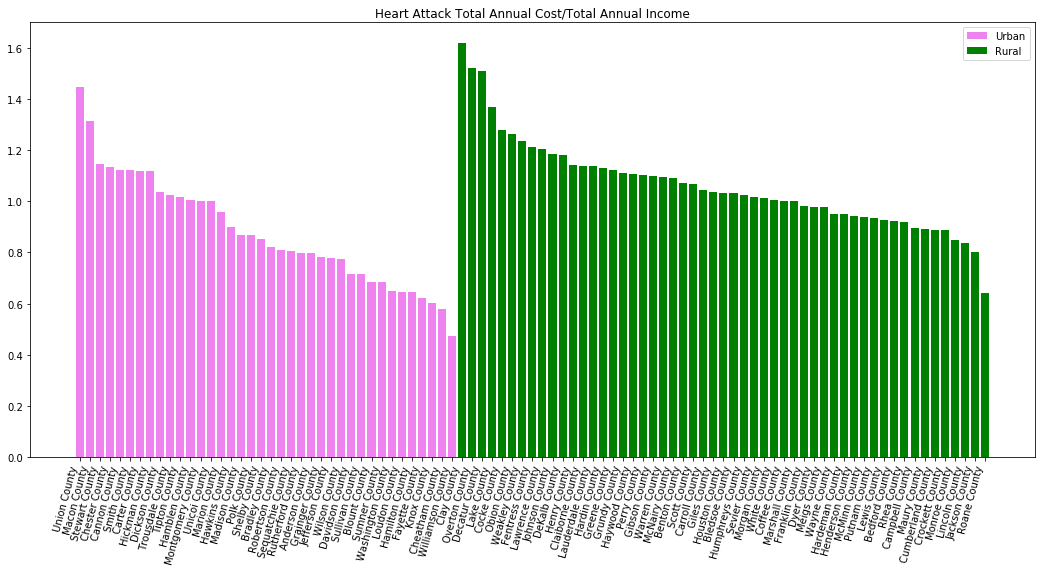

In [65]:
plt.figure(figsize = (18, 8))
plt.bar(urban_heart.county, urban_heart.cost_income_ratio, color = 'violet')
plt.bar(rural_heart.county, rural_heart.cost_income_ratio, color = 'green')
plt.title('Heart Attack Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

Urban vs Rural Counties - Cancer

In [66]:
urban_cancer = TN_cancer2.loc[TN_cancer2.urban == 'Urban'].sort_values('cost_income_ratio', ascending = False)
rural_cancer = TN_cancer2.loc[TN_cancer2.urban == 'Rural'].sort_values('cost_income_ratio', ascending = False)

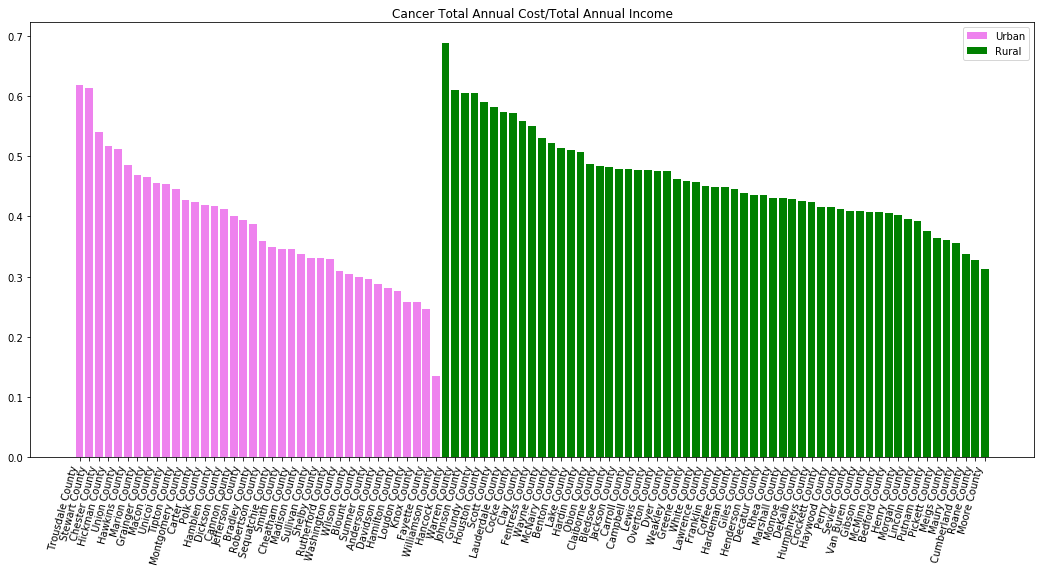

In [67]:
plt.figure(figsize = (18, 8))
plt.bar(urban_cancer.county, urban_cancer.cost_income_ratio, color = 'violet')
plt.bar(rural_cancer.county, rural_cancer.cost_income_ratio, color = 'green')
plt.title('Cancer Total Annual Cost/Total Annual Income')
plt.legend(['Urban', 'Rural'])
plt.xticks(rotation = 75, ha = 'right');

Heart Attack vs Cancer

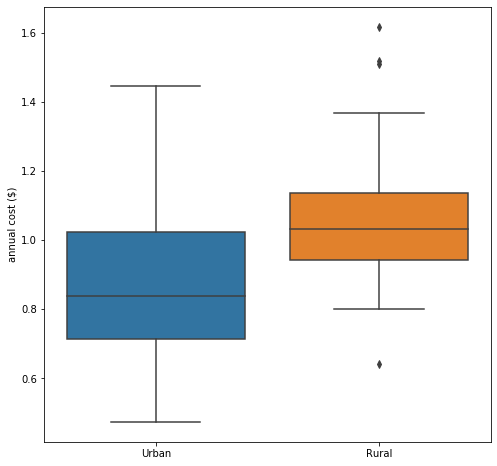

In [68]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = TN_heart2.urban, y = TN_heart2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

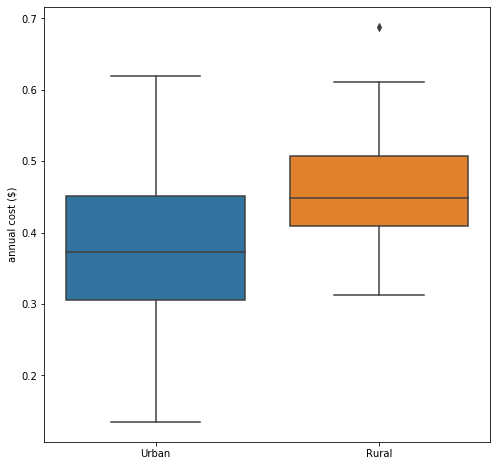

In [69]:
plt.figure(figsize = (8, 8))

sns.boxplot(x = TN_cancer2.urban, y = TN_cancer2.cost_income_ratio, order=["Urban", "Rural"])
plt.xlabel("")
plt.ylabel('annual cost ($)');

In [70]:
print(len(TN_cancer2.analysis_value))
print(len(TN_heart2.analysis_value))

95
91


In [71]:
TN_cancer2.loc[~TN_cancer2.county.isin(TN_heart2.county)] #tilda says 'not those'

,county,urban,analysis_value,avg_income,cost_income_ratio
12,Hancock County,Rural,22515,32717.0,0.688174
85,Moore County,Rural,16978,54317.0,0.312572
87,Pickett County,Rural,16768,46015.0,0.364403
91,Van Buren County,Rural,16244,39762.0,0.408531


In [72]:
TN_cancer3 = TN_cancer2.drop(index = [12, 85, 87, 91])

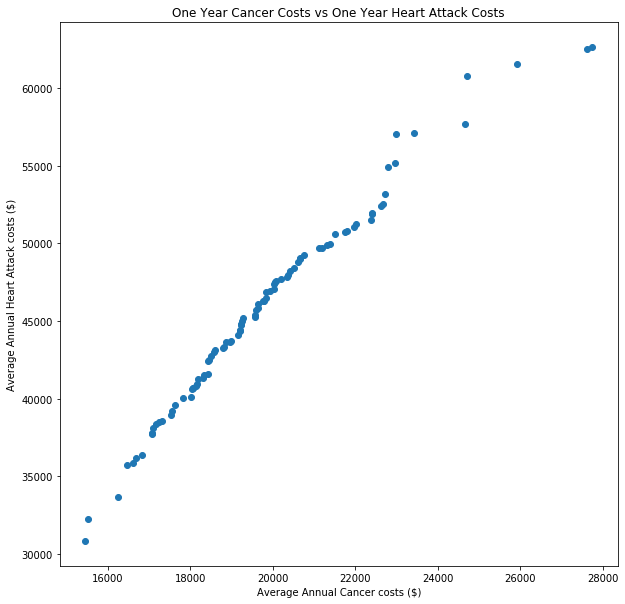

In [73]:
plt.figure(figsize = (10, 10))

plt.scatter(TN_cancer3.analysis_value, TN_heart2.analysis_value, marker = 'o')
plt.title('One Year Cancer Costs vs One Year Heart Attack Costs')
plt.xlabel('Average Annual Cancer costs ($)')
plt.ylabel('Average Annual Heart Attack costs ($)');

Chloropleth of TN counties

In [74]:
counties = gpd.read_file('/Users/staufferkm/Desktop/gitrepos/2019DataEssentials1/data/county/tn_counties.shp')
counties.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."


In [75]:
counties = counties.to_crs(epsg = 4326)
counties.crs

{'init': 'epsg:4326', 'no_defs': True}

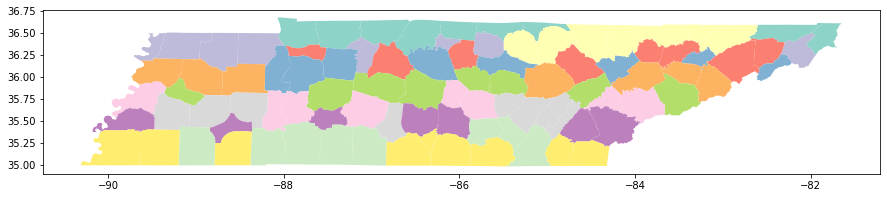

In [76]:
fig, ax = plt.subplots(figsize = (15, 8))
counties.plot(ax = ax, cmap ='Set3'); #took out columm = 'COUNTY' bc it wasn't working
#counties.plot(ax = ax, column = counties.COUNTY, cmap = 'Set3');

Next we'll merge the cancer data with the county GeoDataFrame

In [77]:
# first we drop the word *County* from the cancer data using string slicing
TN_cancer2.county = TN_cancer2.county.str[:-7]

In [78]:
# now we can merge, making sure the counties GeoDataFrame is on the left so our result is a GeoDataFrame
geo_cancer = pd.merge(counties, TN_cancer2, left_on = 'COUNTY', right_on = 'county')
geo_cancer.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry,county,urban,analysis_value,avg_income,cost_income_ratio
0,0.128263,1.518444,2,77,59,Stewart,TN,POLYGON ((-88.05331199918399 36.49702375226808...,Stewart,Urban,27740,45266.0,0.612822
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((-87.1152624258597 36.6422913097144, ...",Robertson,Urban,18809,52416.0,0.358841


### Now a choropleth of cancer cost/income ratios
 - Set up a normalized _sequential_ color map for our chorlopleth
 - define the fig and ax
 - create a divider for the colorbar (because the default legend is wacky)
 - draw the map

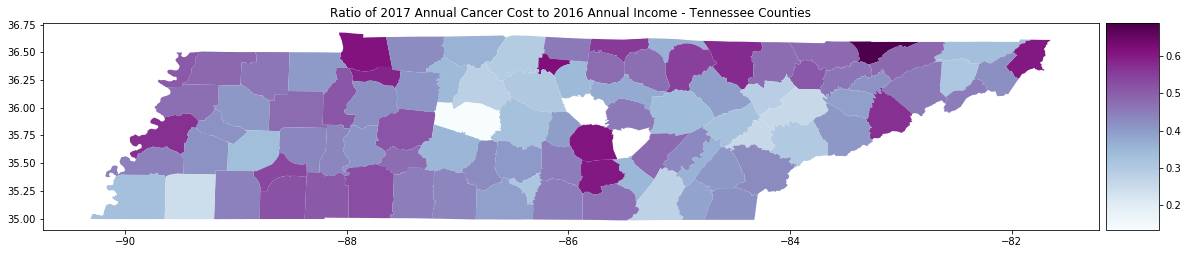

In [79]:
cmap = cm.ScalarMappable(
      norm = Normalize(geo_cancer.cost_income_ratio.min(), geo_cancer.cost_income_ratio.max()), 
      cmap = 'BuPu')
cmap.set_array([]) 

fig, ax = plt.subplots(figsize = (20, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax = ax, column = 'cost_income_ratio', cmap = 'BuPu')
ax.set_title('Ratio of 2017 Annual Cancer Cost to 2016 Annual Income - Tennessee Counties');

In [80]:
TN_total = pd.merge(TN_heart2, TN_cancer3, on=('county', 'urban', 'avg_income'))

In [81]:
TN_total.columns = ['county', 'urban', 'heart_av', 'avg_income', 'heart_cir', 'cancer_av', 'cancer_cir']

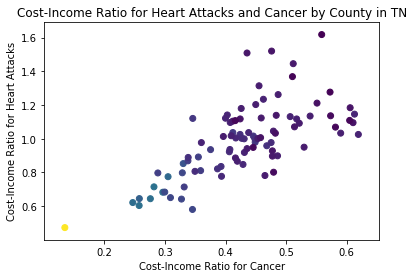

In [82]:
fig, ax = plt.subplots(figsize=(6, 4)) #fig = figure, ax = axes saved in a tuple
ax.scatter(TN_total.cancer_cir, TN_total.heart_cir, c=TN_total.avg_income) #line plot
ax.set_title('Cost-Income Ratio for Heart Attacks and Cancer by County in TN')
ax.set_xlabel('Cost-Income Ratio for Cancer')
ax.set_ylabel('Cost-Income Ratio for Heart Attacks');
#I'd like to figure out how to color the dots by avg_income

In [83]:
TN_total1 = pd.merge(TN_total, income_county_agg, on=('county', 'avg_income'))

What does the exploratory data analysis suggest about our question?

I think it suggests that Rural counties have higher healthcare costs for both cancer and heart attacks, as costs of cancer and heart attacks are correlated.

Using existing features in the provided datasets or engineering new features from the existing ones, build a Logistic Regression Model and evaluate it

The outcome to be predicted should be whether a county’s costincome ratio is above or below the mean for TN
First create a label for the data that answers that

In [84]:
# create target variable
heart_cir_mean = TN_total1.heart_cir.mean()
cancer_cir_mean = TN_total1.cancer_cir.mean()
TN_total1['heart_cir_above_mean'] = [1 if ratio > heart_cir_mean else 0 for ratio in TN_total1.heart_cir]
TN_total1['cancer_cir_above_mean'] = [1 if ratio > cancer_cir_mean else 0 for ratio in TN_total1.cancer_cir]


In [85]:
TN_total1.heart_cir_above_mean.value_counts(normalize = True)

1    0.527473
0    0.472527
Name: heart_cir_above_mean, dtype: float64

In [86]:
TN_total1.cancer_cir_above_mean.value_counts(normalize = True)

1    0.505495
0    0.494505
Name: cancer_cir_above_mean, dtype: float64

In [87]:
TN_total1.head(2)

,county,urban,heart_av,avg_income,heart_cir,cancer_av,cancer_cir,return_count,single_returns,joint_returns,...,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,heart_cir_above_mean,cancer_cir_above_mean
0,Decatur County,Rural,62641,41512.0,1.508985,18076,0.435440,4580,1790,2100,...,9320,2890,1370,186875,4560,189293,230,817,1,1
1,Overton County,Rural,62486,41100.0,1.520341,19563,0.475985,8930,3590,4200,...,18220,5680,2310,360274,8900,365787,320,739,1,1


Use `pd.get_dummies()` with your explanatory variables to encode any categorical values. Features for your model must be numeric.

In [88]:
# encode urban/rural
TN_total1 = pd.get_dummies(TN_total1, columns = ['urban'], drop_first = True)
TN_total1.head(2)

,county,heart_av,avg_income,heart_cir,cancer_av,cancer_cir,return_count,single_returns,joint_returns,head_of_house_returns,...,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban
0,Decatur County,62641,41512.0,1.508985,18076,0.435440,4580,1790,2100,610,...,2890,1370,186875,4560,189293,230,817,1,1,0
1,Overton County,62486,41100.0,1.520341,19563,0.475985,8930,3590,4200,990,...,5680,2310,360274,8900,365787,320,739,1,1,0


In [89]:
X = TN_total1[['urban_Urban']]
y = TN_total1.heart_cir_above_mean

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)

In [91]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred = logistic_model.predict(X_test)

In [93]:
print(metrics.accuracy_score(y_test, y_pred))

0.8260869565217391


#### the naive model (predicting the cost-income ratio above the mean for all cases) would have accuracy 0.527473

In [94]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [9 4]
    Actual Above Mean:    [ 0 10]


In [95]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(y_test, y_pred_prob))

Area Under Curve: 0.8461538461538461


In [96]:
health_rankings = pd.read_excel('/Users/staufferkm/Desktop/gitrepos/vanderbilt-data-essentials-cohort-2/data/2018 County Health Rankings Tennessee Data - v3.xls', 
                                sheet_name = 'Outcomes & Factors Rankings',
                               header = [0,1])

In [97]:
health_rankings.head(2)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Health Outcomes  \
                FIPS              State             County         Z-Score   
0              47000          Tennessee                NaN             NaN   
1              47001          Tennessee           Anderson        -0.26765   

        Health Factors        
   Rank        Z-Score  Rank  
0   NaN            NaN   NaN  
1  34.0      -0.423951  15.0

In [98]:
health_rankings.columns = ['fips', 'state', 'county', 'outcomes_z_score', 'outcomes_rank', 'factors_z_score', 'factors_rank']
health_rankings.head()

,fips,state,county,outcomes_z_score,outcomes_rank,factors_z_score,factors_rank
0,47000,Tennessee,NaN,NaN,NaN,NaN,NaN
1,47001,Tennessee,Anderson,-0.267650,34.0,-0.423951,15.0
2,47003,Tennessee,Bedford,-0.162724,38.0,0.065383,54.0
3,47005,Tennessee,Benton,0.976719,84.0,0.438683,83.0
4,47007,Tennessee,Bledsoe,-0.797663,15.0,0.825123,92.0


In [99]:
health_factors = health_rankings[['county', 'factors_z_score']]

#### merge `health_factors` and `tn_ha_costs2` 

In [100]:
TN_total1.head(2)

,county,heart_av,avg_income,heart_cir,cancer_av,cancer_cir,return_count,single_returns,joint_returns,head_of_house_returns,...,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban
0,Decatur County,62641,41512.0,1.508985,18076,0.435440,4580,1790,2100,610,...,2890,1370,186875,4560,189293,230,817,1,1,0
1,Overton County,62486,41100.0,1.520341,19563,0.475985,8930,3590,4200,990,...,5680,2310,360274,8900,365787,320,739,1,1,0


In [101]:
TN_total1.county = TN_total1.county.str[0:-7]

In [102]:
TN_total2 =pd.merge(TN_total1, health_factors, on = 'county', how = 'left')
TN_total2.head(2)

,county,heart_av,avg_income,heart_cir,cancer_av,cancer_cir,return_count,single_returns,joint_returns,head_of_house_returns,...,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban,factors_z_score
0,Decatur,62641,41512.0,1.508985,18076,0.435440,4580,1790,2100,610,...,1370,186875,4560,189293,230,817,1,1,0,0.264873
1,Overton,62486,41100.0,1.520341,19563,0.475985,8930,3590,4200,990,...,2310,360274,8900,365787,320,739,1,1,0,0.188040


In [103]:
X = TN_total2[['urban_Urban', 'factors_z_score']]
y = TN_total2.heart_cir_above_mean

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 99)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_pred = logistic_model.predict(X_test)

In [106]:
print(metrics.accuracy_score(y_test, y_pred))

0.5652173913043478


In [107]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(y_test, y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(y_test, y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [6 7]
    Actual Above Mean:    [3 7]


In [108]:
health = pd.read_csv('/Users/staufferkm/Desktop/gitrepos/vanderbilt-data-essentials-cohort-2/data/HealthData.csv')

In [109]:
health.head()

,State,County,PercentSmokers,PercentObese,PercentLimAccesstoHealthyFood,PercentObese.1,PercentPhysicallyInactive,PercentUnder18YO,Percent65YOAndOver,PercentNonHispanicWhite,PercentFemale,PercentRural,PCPRate,PercentUnemployment,PreventableHospitalStayRate,NumberofHospitals,Population,PeopleServedPerHospital
0,Tennessee,TN,22,33,8.0,33,27,22.4,16.0,74.4,51.2,33.6,72.0,3.7,5305,153,6715984,43895.32026
1,Tennessee,Anderson,21,32,9.0,32,28,21.2,19.8,89.6,51.3,34.7,61.0,3.9,4867,2,76257,38128.50000
2,Tennessee,Bedford,21,33,7.0,33,33,25.5,15.1,77.5,50.9,55.6,38.0,3.9,6034,1,48117,48117.00000
3,Tennessee,Benton,23,35,7.0,35,32,19.5,23.7,93.0,50.9,78.5,19.0,5.4,6528,1,15986,15986.00000
4,Tennessee,Bledsoe,26,35,2.0,35,29,16.0,18.1,89.0,41.2,100.0,7.0,5.9,5025,1,14717,14717.00000


In [110]:
TN_total3 = pd.merge(TN_total2, health, left_on = 'county', right_on = 'County')
TN_total3.head(2)

,county,heart_av,avg_income,heart_cir,cancer_av,cancer_cir,return_count,single_returns,joint_returns,head_of_house_returns,...,Percent65YOAndOver,PercentNonHispanicWhite,PercentFemale,PercentRural,PCPRate,PercentUnemployment,PreventableHospitalStayRate,NumberofHospitals,Population,PeopleServedPerHospital
0,Decatur,62641,41512.0,1.508985,18076,0.435440,4580,1790,2100,610,...,23.0,92.0,50.8,100.0,42.0,5.2,6580,1,11751,11751.0
1,Overton,62486,41100.0,1.520341,19563,0.475985,8930,3590,4200,990,...,20.2,96.0,50.7,84.2,36.0,4.1,7077,1,22012,22012.0


In [111]:
TN_total3.urban_Urban

0     0
1     0
2     1
3     1
4     0
     ..
86    0
87    0
88    1
89    1
90    0
Name: urban_Urban, Length: 91, dtype: uint8

In [112]:
TN_total3.columns

Index(['county', 'heart_av', 'avg_income', 'heart_cir', 'cancer_av',
       'cancer_cir', 'return_count', 'single_returns', 'joint_returns',
       'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi',
       'returns_with_total_inc', 'total_inc_amt', 'returns_with_unemployment',
       'unemployment_comp', 'heart_cir_above_mean', 'cancer_cir_above_mean',
       'urban_Urban', 'factors_z_score', 'State', 'County', 'PercentSmokers',
       'PercentObese', 'PercentLimAccesstoHealthyFood', 'PercentObese.1',
       'PercentPhysicallyInactive', 'PercentUnder18YO', 'Percent65YOAndOver',
       'PercentNonHispanicWhite', 'PercentFemale', 'PercentRural', 'PCPRate',
       'PercentUnemployment', 'PreventableHospitalStayRate',
       'NumberofHospitals', 'Population', 'PeopleServedPerHospital'],
      dtype='object')

In [113]:
TN_total4 = TN_total3[['county', 'avg_income', 'heart_cir_above_mean', 'cancer_cir_above_mean', 'urban_Urban', 'factors_z_score', 'PercentSmokers', 'PercentObese', 'PercentLimAccesstoHealthyFood', 'PercentPhysicallyInactive', 'PercentUnder18YO', 'Percent65YOAndOver', 'PercentNonHispanicWhite', 'PercentFemale', 'PercentRural', 'PCPRate', 'PercentUnemployment', 'PreventableHospitalStayRate', 'PeopleServedPerHospital']]


In [114]:
TN_total4.loc[TN_total4.PCPRate.isnull()]

,county,avg_income,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban,factors_z_score,PercentSmokers,PercentObese,PercentLimAccesstoHealthyFood,PercentPhysicallyInactive,PercentUnder18YO,Percent65YOAndOver,PercentNonHispanicWhite,PercentFemale,PercentRural,PCPRate,PercentUnemployment,PreventableHospitalStayRate,PeopleServedPerHospital
21,Lake,36437.0,1,1,0,1.104794,27,35,0.0,32,14.7,15.6,67.4,36.1,100.0,NaN,5.6,11277,0.0
65,Grundy,37412.0,1,1,0,0.736935,25,34,1.0,30,21.9,20.8,96.2,50.5,100.0,NaN,5.0,6307,0.0


In [115]:
# Delete rows with index label a & b    
TN_total5 = TN_total4.drop([21 , 65])

In [116]:
TN_total5.reset_index()

,index,county,avg_income,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban,factors_z_score,PercentSmokers,PercentObese,PercentLimAccesstoHealthyFood,PercentPhysicallyInactive,PercentUnder18YO,Percent65YOAndOver,PercentNonHispanicWhite,PercentFemale,PercentRural,PCPRate,PercentUnemployment,PreventableHospitalStayRate,PeopleServedPerHospital
0,0,Decatur,41512.0,1,1,0,0.264873,21,33,3.0,34,21.1,23.0,92.0,50.8,100.0,42.0,5.2,6580,11751.0
1,1,Overton,41100.0,1,1,0,0.188040,24,36,0.0,31,21.6,20.2,96.0,50.7,84.2,36.0,4.1,7077,22012.0
2,2,Williamson,130072.0,0,0,1,-2.074113,15,25,3.0,20,27.5,12.8,85.4,51.1,19.4,149.0,2.7,3173,75419.0
3,3,Union,42048.0,1,1,1,0.399477,23,36,1.0,30,22.0,18.0,96.4,50.6,100.0,16.0,4.4,4809,0.0
4,4,Clay,35658.0,1,1,0,0.434882,25,31,0.0,32,20.1,24.1,95.0,50.6,100.0,39.0,5.1,6388,7703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,86,Hardeman,37769.0,0,1,0,0.622628,24,38,19.0,29,19.7,17.7,54.9,45.2,80.2,24.0,5.2,6975,25447.0
85,87,Roane,55605.0,0,0,0,-0.135621,21,35,9.0,24,19.0,22.5,93.0,51.2,51.0,36.0,4.4,5907,53036.0
86,88,Grainger,43087.0,0,1,1,0.010660,23,32,0.0,29,20.6,20.0,94.9,49.6,100.0,17.0,4.2,4399,0.0
87,89,Cheatham,55583.0,0,0,1,-0.403582,21,34,1.0,25,22.7,14.4,93.2,50.4,83.0,50.0,3.0,5881,40330.0


In [ ]:
#hosp = pd.read_csv('/Users/staufferkm/Desktop/gitrepos/vanderbilt-data-essentials-cohort-2/data/TNHospital_General_Info.csv')

In [117]:
#hosp.columns

In [151]:
#hosp.columns = ['ProviderID', 'HospitalName', 'Address', 'City', 'State', 'ZIPCode', 'CountyName', 'PhoneNumber', 'HospitalType', 'HospitalOwnership', 'EmergencyServices', 'MeetsCriteriaForMeaningfulUseOfEHRs', 'HospitalOverallRating', 'HospitalOverallRatingFootnote', 'MortalityNationalComparison', 'MortalityNationalComparisonFootnote', 'SafetyOfCareNationalComparison', 'SafetyOfCareNationalComparisonFootnote', 'ReadmissionNationalComparison', 'ReadmissionNationalComparisonFootnote', 'PatientExperienceNationalComparison', 'PatientExperienceNationalComparisonFootnote', 'EffectivenessOfCareNationalComparison', 'EffectivenessOfCareNationalComparisonFootnote', 'TimelinessOfCareNationalComparison', 'TimelinessOfCareNationalComparisonFootnote', 'EfficientUseOfMedicalImagingNationalComparison', 'EfficientUseOfMedicalImagingNationalComparisonFootnote', 'Location']


#hosp1 = hosp[['ProviderID', 'HospitalName', 'State', 'CountyName', 'EmergencyServices', 'MeetsCriteriaForMeaningfulUseOfEHRs', 'HospitalOverallRating', 'MortalityNationalComparison', 'SafetyOfCareNationalComparison', 'ReadmissionNationalComparison', 'PatientExperienceNationalComparison', 'EffectivenessOfCareNationalComparison', 'TimelinessOfCareNationalComparison', 'EfficientUseOfMedicalImagingNationalComparison']]


In [153]:
#hosp1.CountyName = hosp1.CountyName.str.capitalize()

In [118]:
#hosp1.CountyName

Need to make a new table with County Name and Average Hospital Rankings

In [149]:
#hosp_rating = []

In [119]:
#hosp1.HospitalOverallRating
#hosp1.groupby('CountyName', as_index=False).agg({"HospitalOverallRating": "mean"})


In [120]:
food_access = pd.read_csv('/Users/staufferkm/Desktop/gitrepos/vanderbilt-data-essentials-cohort-2/data/grocery_fastfood.csv')
food_access.head()

,State,County,GROCPTH14,FFRPTH14
0,AL,Autauga,0.072209,0.649878
1,AL,Baldwin,0.144920,0.659634
2,AL,Barbour,0.185963,0.818239
3,AL,Bibb,0.222163,0.222163
4,AL,Blount,0.103952,0.363832


In [121]:
tn_food_access = food_access.query('State == "TN"')
tn_food_access.head()

,State,County,GROCPTH14,FFRPTH14
2428,TN,Anderson,0.172122,0.847368
2429,TN,Bedford,0.128681,0.514723
2430,TN,Benton,0.247755,0.495509
2431,TN,Bledsoe,0.071782,0.000000
2432,TN,Blount,0.126643,0.506574


In [122]:
tn_food_access.columns = ['state', 'county', 'GROCPTH14', 'FFRPTH14']
tn_food_access.head()

,state,county,GROCPTH14,FFRPTH14
2428,TN,Anderson,0.172122,0.847368
2429,TN,Bedford,0.128681,0.514723
2430,TN,Benton,0.247755,0.495509
2431,TN,Bledsoe,0.071782,0.000000
2432,TN,Blount,0.126643,0.506574


In [193]:
tn_food_access['fast_grocery_ratio'] = tn_food_access.FFRPTH14 / tn_food_access.GROCPTH14

In [124]:
TN_total6 = pd.merge(TN_total5, tn_food_access, on = 'county')
TN_total5.head(5)

,county,avg_income,heart_cir_above_mean,cancer_cir_above_mean,urban_Urban,factors_z_score,PercentSmokers,PercentObese,PercentLimAccesstoHealthyFood,PercentPhysicallyInactive,PercentUnder18YO,Percent65YOAndOver,PercentNonHispanicWhite,PercentFemale,PercentRural,PCPRate,PercentUnemployment,PreventableHospitalStayRate,PeopleServedPerHospital
0,Decatur,41512.0,1,1,0,0.264873,21,33,3.0,34,21.1,23.0,92.0,50.8,100.0,42.0,5.2,6580,11751.0
1,Overton,41100.0,1,1,0,0.188040,24,36,0.0,31,21.6,20.2,96.0,50.7,84.2,36.0,4.1,7077,22012.0
2,Williamson,130072.0,0,0,1,-2.074113,15,25,3.0,20,27.5,12.8,85.4,51.1,19.4,149.0,2.7,3173,75419.0
3,Union,42048.0,1,1,1,0.399477,23,36,1.0,30,22.0,18.0,96.4,50.6,100.0,16.0,4.4,4809,0.0
4,Clay,35658.0,1,1,0,0.434882,25,31,0.0,32,20.1,24.1,95.0,50.6,100.0,39.0,5.1,6388,7703.0


In [126]:
dan = pd.read_csv('/Users/staufferkm/Desktop/gitrepos/vanderbilt-data-essentials-cohort-2/data/diabetes_hospitalranks_lengthofstay.csv')
dan.head()

,county,diabetes_prevalence,hospital_length_of_stay,hospital_score
0,Anderson,0.123,4.4,76
1,Bedford,0.115,3.5,66
2,Benton,0.143,6.1,80
3,Bledsoe,0.125,5.8,72
4,Blount,0.137,4.9,62


In [129]:
TN_total7 = pd.merge(TN_total6, dan, on = 'county')
TN_total7.county

0        Decatur
1        Overton
2     Williamson
3          Union
4           Clay
         ...    
83     Jefferson
84      Hardeman
85         Roane
86      Grainger
87       Jackson
Name: county, Length: 88, dtype: object

In [138]:
TN_total7.to_csv('HealthFactorData_Oct20.csv')

Now onto building the model

In [143]:
pd.options.display.max_rows = 24

In [144]:
TN_total7.corr().cancer_cir_above_mean

avg_income                      -0.451318
heart_cir_above_mean             0.409514
cancer_cir_above_mean            1.000000
urban_Urban                     -0.345307
factors_z_score                  0.499916
PercentSmokers                   0.430604
PercentObese                     0.063392
PercentLimAccesstoHealthyFood   -0.221576
PercentPhysicallyInactive        0.336988
PercentUnder18YO                -0.166101
Percent65YOAndOver               0.183311
PercentNonHispanicWhite          0.261534
PercentFemale                   -0.227989
PercentRural                     0.505739
PCPRate                         -0.359476
PercentUnemployment              0.467078
PreventableHospitalStayRate      0.208791
PeopleServedPerHospital         -0.387087
GROCPTH14                        0.218251
FFRPTH14                        -0.378005
fast_grocery_ratio              -0.426080
diabetes_prevalence              0.359675
hospital_length_of_stay         -0.151768
hospital_score                   0

In [145]:
TN_total7.corr().heart_cir_above_mean
#looks like best predictors are avg_income, PercentSmokers, PCPRate, fast_grocery_ratio

avg_income                      -0.432585
heart_cir_above_mean             1.000000
cancer_cir_above_mean            0.409514
urban_Urban                     -0.246155
factors_z_score                  0.380589
PercentSmokers                   0.318012
PercentObese                     0.112937
PercentLimAccesstoHealthyFood   -0.136007
PercentPhysicallyInactive        0.233911
PercentUnder18YO                 0.022482
Percent65YOAndOver               0.057554
PercentNonHispanicWhite          0.172549
PercentFemale                   -0.150948
PercentRural                     0.392749
PCPRate                         -0.346390
PercentUnemployment              0.259490
PreventableHospitalStayRate      0.295060
PeopleServedPerHospital         -0.268727
GROCPTH14                        0.101110
FFRPTH14                        -0.217151
fast_grocery_ratio              -0.260328
diabetes_prevalence              0.202664
hospital_length_of_stay          0.068644
hospital_score                   0

In [147]:
TN_total_Rur = TN_total7.query('urban_Urban == 0')
TN_total_Rur.shape

(51, 26)

In [148]:
TN_total_Urb = TN_total7.query('urban_Urban == 1')
TN_total_Urb.shape

(37, 26)

In [174]:
TN_total_Rur.corr().heart_cir_above_mean
#looks like best linear predictors are avg income, PercentLimAccesstoHealthyFood,  diabetes_prevalence, hospital_length_of_stay, hospital_score 

avg_income                      -0.425657
heart_cir_above_mean             1.000000
cancer_cir_above_mean            0.279553
urban_Urban                           NaN
factors_z_score                  0.129463
PercentSmokers                   0.020931
PercentObese                     0.028031
PercentLimAccesstoHealthyFood   -0.178031
PercentPhysicallyInactive       -0.015842
PercentUnder18YO                 0.021872
Percent65YOAndOver               0.022304
PercentNonHispanicWhite          0.075424
PercentFemale                   -0.015506
PercentRural                     0.237608
PCPRate                         -0.031061
PercentUnemployment              0.118001
PreventableHospitalStayRate      0.105547
PeopleServedPerHospital         -0.099285
GROCPTH14                       -0.048475
FFRPTH14                        -0.030943
fast_grocery_ratio              -0.066611
diabetes_prevalence              0.138821
hospital_length_of_stay          0.150988
hospital_score                   0

In [150]:
TN_total_Urb.corr().heart_cir_above_mean
#looks like best linear predictors are avg_income, PercentSmokers, FFRPTH14, PercentFemale, PCPRate, PreventableHospitalStayRate

avg_income                      -0.442048
heart_cir_above_mean             1.000000
cancer_cir_above_mean            0.467926
urban_Urban                           NaN
factors_z_score                  0.484207
PercentSmokers                   0.491667
PercentObese                     0.188074
PercentLimAccesstoHealthyFood   -0.034693
PercentPhysicallyInactive        0.291807
PercentUnder18YO                 0.099746
Percent65YOAndOver              -0.088036
PercentNonHispanicWhite          0.215912
PercentFemale                   -0.373084
PercentRural                     0.427383
PCPRate                         -0.498801
PercentUnemployment              0.236627
PreventableHospitalStayRate      0.479922
PeopleServedPerHospital         -0.307620
GROCPTH14                        0.074085
FFRPTH14                        -0.371869
fast_grocery_ratio              -0.311463
diabetes_prevalence              0.129193
hospital_length_of_stay          0.102916
hospital_score                   0

In [177]:
X = TN_total7[['avg_income', 'PercentSmokers','PCPRate', 'fast_grocery_ratio']] 
XR = TN_total_Rur[['avg_income', 'PercentLimAccesstoHealthyFood', 'diabetes_prevalence', 'hospital_length_of_stay', 'hospital_score']] 
XU = TN_total_Urb[['avg_income', 'PercentSmokers', 'FFRPTH14', 'PercentFemale', 'PCPRate', 'PreventableHospitalStayRate']]
y = TN_total7.heart_cir_above_mean
yR = TN_total_Rur.heart_cir_above_mean
yU = TN_total_Urb.heart_cir_above_mean

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

In [179]:
XR_train, XR_test, yR_train, yR_test = train_test_split(XR, yR, random_state = 321)

In [180]:
XU_train, XU_test, yU_train, yU_test = train_test_split(XU, yU, random_state = 321)

Went back and did some digging because I keep getting an error message when running the total logistic model

fast_grocery_ratio is infinity for a few entries because some counties have 0 for the grocery (and dividing by 0 throws an infinity)

so we can either go back and enter a 0 for fast_grocery_ratio for those counties, or throw them out in a TN_total8 model

In [194]:
logistic_model_U = LogisticRegression()
logistic_model_R = LogisticRegression()
#logistic_model = LogisticRegression()
logistic_model_R.fit(XR_train, yR_train)
logistic_model_U.fit(XU_train, yU_train)
#logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
y_pred_train = logistic_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.7575757575757576


In [195]:
yU_pred_train = logistic_model_U.predict(XU_train)
print(metrics.accuracy_score(yU_train, yU_pred_train))

0.8888888888888888


In [196]:
yR_pred_train = logistic_model_R.predict(XR_train)
print(metrics.accuracy_score(yR_train, yR_pred_train))

0.7894736842105263


In [197]:
y_pred = logistic_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

NotFittedError: This LogisticRegression instance is not fitted yet

In [198]:
yU_pred = logistic_model_U.predict(XU_test)
print(metrics.accuracy_score(yU_test, yU_pred))

0.9


In [199]:
yR_pred = logistic_model_R.predict(XR_test)
print(metrics.accuracy_score(yR_test, yR_pred))

0.8461538461538461


A more flexible model --> single decision tree classifier.

In [130]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [131]:
y_pred_train = tree.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [132]:
y_pred = tree.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6086956521739131


In [133]:
export_graphviz(tree, 'tree.dot', feature_names = X.columns, filled=True, rounded=True, special_characters=False, impurity=False)

! dot -Tpng tree.dot -o tree.png

In [134]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [136]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.4782608695652174


In [155]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 4)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [156]:
y_pred_train = forest.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8484848484848485


In [157]:
y_pred = forest.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6521739130434783


In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = forest.feature_importances_, y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Random Forest Feature Importance');